Part I Load data
Create a function load_dataset(), you will load the dataset and returns it.

In [2]:
import requests
import pandas as pd

def load_dataset():
  url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
  r = requests.get(url)

  with open('iris.data', 'w') as f:
      f.write(r.text)

  with open('iris.data') as f:
    iris_data = pd.read_csv(f, header = None)

  iris_data.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
  return iris_data

In [3]:
iris_data = load_dataset()
print(iris_data)

     sepal_len  sepal_wid  petal_len  petal_wid           class
0          5.1        3.5        1.4        0.2     Iris-setosa
1          4.9        3.0        1.4        0.2     Iris-setosa
2          4.7        3.2        1.3        0.2     Iris-setosa
3          4.6        3.1        1.5        0.2     Iris-setosa
4          5.0        3.6        1.4        0.2     Iris-setosa
..         ...        ...        ...        ...             ...
145        6.7        3.0        5.2        2.3  Iris-virginica
146        6.3        2.5        5.0        1.9  Iris-virginica
147        6.5        3.0        5.2        2.0  Iris-virginica
148        6.2        3.4        5.4        2.3  Iris-virginica
149        5.9        3.0        5.1        1.8  Iris-virginica

[150 rows x 5 columns]


Part II Summarizing the dataset
Summarizing the dataset:
Create a function summarize_dataset(), it will print (in this order):

In [4]:
def summarize_dataset():
  print(f' shape is {iris_data.shape}')
  print(f'\nits first 10 lines\n {iris_data.head(10)}')
  print(f'\nstatistical summary \n')
  print(iris_data.describe())
  print("\ndistribution\n")
  print(iris_data.groupby(by = ['class']).size())

summarize_dataset()  

 shape is (150, 5)

its first 10 lines
    sepal_len  sepal_wid  petal_len  petal_wid        class
0        5.1        3.5        1.4        0.2  Iris-setosa
1        4.9        3.0        1.4        0.2  Iris-setosa
2        4.7        3.2        1.3        0.2  Iris-setosa
3        4.6        3.1        1.5        0.2  Iris-setosa
4        5.0        3.6        1.4        0.2  Iris-setosa
5        5.4        3.9        1.7        0.4  Iris-setosa
6        4.6        3.4        1.4        0.3  Iris-setosa
7        5.0        3.4        1.5        0.2  Iris-setosa
8        4.4        2.9        1.4        0.2  Iris-setosa
9        4.9        3.1        1.5        0.1  Iris-setosa

statistical summary 

        sepal_len   sepal_wid   petal_len   petal_wid
count  150.000000  150.000000  150.000000  150.000000
mean     5.843333    3.054000    3.758667    1.198667
std      0.828066    0.433594    1.764420    0.763161
min      4.300000    2.000000    1.000000    0.100000
25%      5.100000 

#A - Univariate

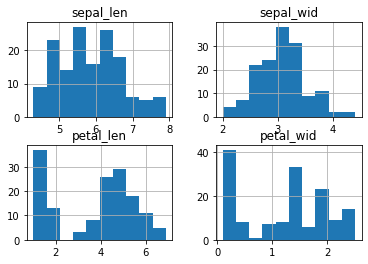

In [5]:
from matplotlib import pyplot

def print_plot_univariate():
  iris_data.hist()
  pyplot.show()


print_plot_univariate()

#B - Multivariate

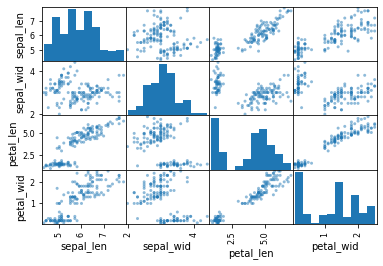

In [6]:
from pandas.plotting import scatter_matrix

def print_plot_multivariate():
  scatter_matrix(iris_data)
  pyplot.show()

print_plot_multivariate()

In [7]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC

def my_print_and_test_models():
    array = iris_data.values
    X = array[:,0:4]
    y = array[:,4]
    X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.2, random_state=1)

    kfold = KFold()

    # Decision Tree
    model_name = 'DecisionTree'
    model = DecisionTreeClassifier()
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    print('%s: %f (%f)' % (model_name, cv_results.mean(), cv_results.std()))

    # GaussianNB
    model_name = 'GaussianNB'
    model = GaussianNB()
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    print('%s: %f (%f)' % (model_name, cv_results.mean(), cv_results.std()))

    # KNeighbors
    model_name = 'KNeighbors'
    model = KNeighborsClassifier()
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    print('%s: %f (%f)' % (model_name, cv_results.mean(), cv_results.std()))

    # LogisticRegression
    model_name = 'LogisticRegression'
    model = LogisticRegression(solver='liblinear', multi_class='ovr')
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    print('%s: %f (%f)' % (model_name, cv_results.mean(), cv_results.std()))
    
    # LinearDiscriminant
    model_name = 'LinearDiscriminant'
    model = LinearDiscriminantAnalysis()
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    print('%s: %f (%f)' % (model_name, cv_results.mean(), cv_results.std()))
    
    # SVM
    model_name = 'SVM'
    model = SVC(gamma='auto')
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    print('%s: %f (%f)' % (model_name, cv_results.mean(), cv_results.std()))
    

my_print_and_test_models()

DecisionTree: 0.908333 (0.048591)
GaussianNB: 0.950000 (0.040825)
KNeighbors: 0.916667 (0.045644)
LogisticRegression: 0.941667 (0.033333)
LinearDiscriminant: 0.975000 (0.020412)
SVM: 0.975000 (0.020412)
